# scikit-learn

## Supervised Linear Regression Training

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [2]:
print(f"ds has {len(diabetes.data)} records of data")
print(dir(diabetes))
print(diabetes.feature_names)

ds has 442 records of data
['DESCR', 'data', 'data_filename', 'feature_names', 'frame', 'target', 'target_filename']
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [3]:
# diabetes
diabetes.feature_names, list(zip(diabetes.data, diabetes.target))

(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
 [(array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
          -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]),
   151.0),
  (array([-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
          -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405]),
   75.0),
  (array([ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
          -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]),
   141.0),
  (array([-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
           0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191]),
   206.0),
  (array([ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
           0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]),
   135.0),
  (array([-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
          -0.07928784,  0.04127682, -0.076394

In [4]:
# create estimator from linear model
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [5]:
# training
regr.fit(diabetes.data, diabetes.target)
# get coefficients on 10 features 
print(regr.coef_)
# how good is the linear relationship on the samples: 1-perfect linear, 0-nonlinear
print(regr.score(diabetes.data, diabetes.target))

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
0.5177494254132934


In [6]:
ages = [x[0] for x in diabetes.data]
yhat = regr.predict(diabetes.data)

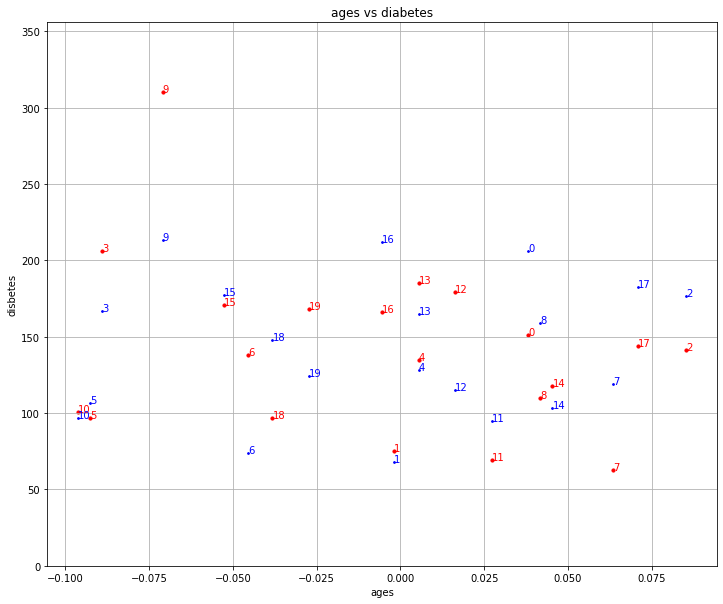

In [7]:
# ages vs diabete degrees
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.ylim(0, max(diabetes.target) + 10)

# how many sample to plot
N = 20 # len(ages)
# annotate points
is_annotate = True

# sample values
plt.scatter(ages[:N], diabetes.target[:N], s=10, c='r')
if is_annotate:
    for i in range(N):
        plt.annotate(i, (ages[i], diabetes.target[i]), c='r')
# predict
plt.scatter(ages[:N], yhat[:N], s=3, c='b')
if is_annotate:
    for i in range(N):
        plt.annotate(i, (ages[i], yhat[i]), c='b')

plt.title('ages vs diabetes')
plt.xlabel('ages')
plt.ylabel('disbetes')
plt.grid()
plt.show()